# Implementation

- E steps / update class assignment

    Given $\mu_k$ (class means), (1) calculate the distance between $\mu_k$ and all data (2) sort the distance (3) assign "class label" $r_{nk}$

- M steps / update class mean

    Given $r_{nk}$, calculate $\mu_k$ for each class

- convergence check:

    if the change of class means is small enough (here we use L2 norm)

In [1]:
import numpy as np

class k_means():
    
    def __init__(self, num_classes):
        self.K = num_classes
    
    def distance_function(self, class_means, data):
        
        # class_means: [K, D] 
        # data: [N, D]
        # calculate the distance between each data point and class means
        # return the distance as [N, K] each row is the distance between a data points and all class 
        
        K, D = class_means.shape
        N, _ = data.shape
        
        class_means = class_means.reshape(1, K, D) 
        data = data.reshape(N, 1, D)
        
        distance = np.sqrt(np.sum((data - class_means)**2, axis = 2)) #[N, K]
        
        return distance


    def update_class_assignment(self, class_means, data):
        
        # given class mean, calculate class assignment
        # class_means: [K, D] 
        # data: [N, D]
        
        distance = self.distance_function(class_means, data) # [N, K]
        
        N, D = data.shape
        
        closest_class = distance.argmin(1) # log closest class index for each data, [N, ]

        class_assignment = np.zeros((N, self.K))
        
        for datapoint_index, datapoint_assignment in enumerate(class_assignment):
            cur_class_assignment = closest_class[datapoint_index]
            datapoint_assignment[cur_class_assignment] = 1
        
        return class_assignment

    def update_class_mean(self, class_assignment, data):
        # data: [N, D]
        # class_assignment: [N, K] note that the k-th column indicates whether each data points belongs to class k
        
        N, D = data.shape

        class_means = np.zeros((self.K, D))
        
        for k in range(self.K):
            k_class_assignment = class_assignment[:, k].reshape(N, 1)
            # first compute the sum
            k_class_mean = np.sum(data * k_class_assignment, axis=0) # [N, D] * [N, 1] -> [N, D]
            # then take the mean if there're more than one data points assigned
            if np.sum(k_class_assignment) > 1:
                k_class_mean = k_class_mean / np.sum(k_class_assignment)
                
            class_means[k] = k_class_mean
        
        return class_means

    def fit(self, data, steps):
        
        N, D = data.shape
        
        class_means = np.random.random((self.K, D))

        for step in range(steps):
            class_assignment = self.update_class_assignment(class_means, data)
            old_class_means = class_means
            class_means = self.update_class_mean(class_assignment, data)
            
            if np.linalg.norm(old_class_means - class_means) < 1e-3:
                break
        
        return class_assignment, class_means
    
    
    

# Test

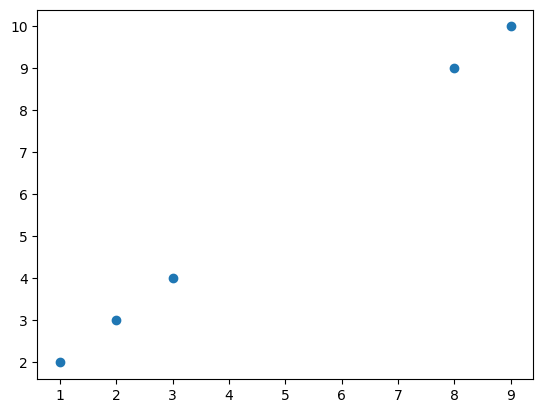

In [2]:
points = [[1, 2], [2, 3], [3, 4], [8, 9], [9, 10]]
k = 2  # Number of clusters

import matplotlib.pyplot as plt

plt.scatter(np.array(points)[:, 0], np.array(points)[:, 1])

In [3]:
k_means_model = k_means(num_classes=k)

k_means_model.fit(np.array(points), 20)

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]]),
 array([[2. , 3. ],
        [8.5, 9.5]]))

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(np.array(points))

In [5]:
kmeans.labels_

array([1, 1, 1, 0, 0], dtype=int32)

In [6]:
kmeans.cluster_centers_

array([[8.5, 9.5],
       [2. , 3. ]])